# Random Walk



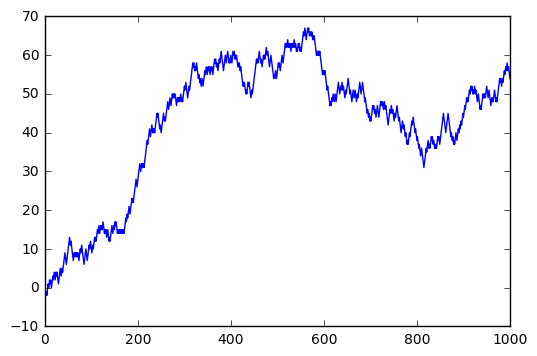

In [2]:
import random
import matplotlib.pyplot as plt
position = 0 # initial position
walk = [position]
steps = 1000
for i in range(steps):
    step = 1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
plt.plot(walk)
plt.show()

Another way to generate random walk is that we can consider the position as a accumulated sum of the random series of -1 or 1.

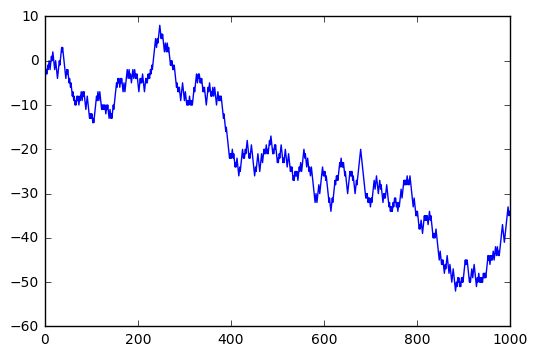

In [3]:
import numpy as np
nsteps = 1000
draws = np.random.randint(0,2,size = nsteps)
steps = np.where(draws > 0 , 1, -1)
walk = steps.cumsum()
plt.plot(walk)
plt.show()

Get the furthers position 

In [4]:
walk.max()


8

In [5]:
walk.min()

-52

First crossing time. That is the step at which the random walk reaches a particular value

In [6]:
(np.abs(walk)>=10).argmax()

65

Time spend on above the initial position

In [10]:
sum(walk >0)

46

## Simulate Multicple random walks at once

In [52]:
nwalks = 5000
nsteps = 1000
draws = np.random.randint(0,2,size = (nwalks,nsteps))
steps = np.where(draws > 0 ,1,-1)
walks = steps.cumsum(1)
walks

array([[  1,   0,  -1, ...,  42,  41,  42],
       [  1,   0,   1, ...,  42,  41,  42],
       [  1,   2,   3, ..., -44, -45, -46],
       ..., 
       [ -1,  -2,  -1, ...,   0,   1,   0],
       [  1,   2,   1, ..., -28, -27, -28],
       [ -1,   0,   1, ..., -18, -17, -18]], dtype=int32)

Out of these random walks, compute the minimum crossing time to 30, or -30

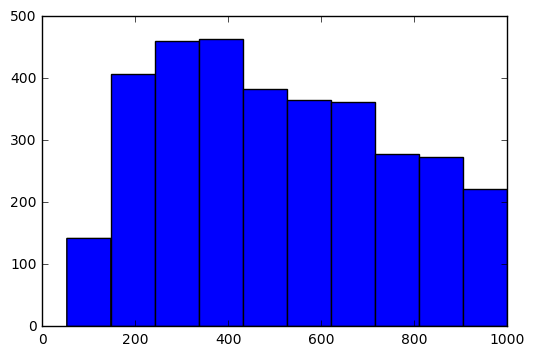

In [53]:
hits30 = (np.abs(walks)>=30).any(1)
cross_time = (np.abs(walks[hits30])>=30).argmax(1)
plt.hist(cross_time)
plt.show()

Calculated the time stayed above the initial position

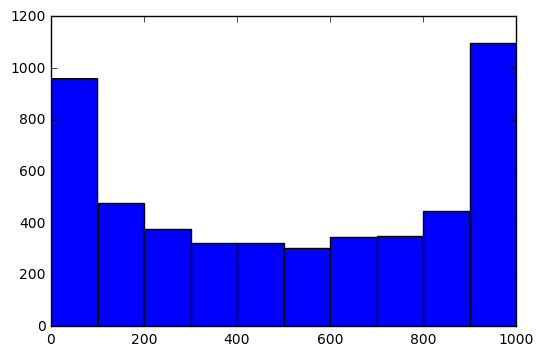

In [54]:
temp = walks.copy()
temp[temp>=0] = 1
temp[temp<0] = 0
plt.hist(temp.sum(axis = 1))
plt.show()